# Release Highlights for scikit-learn 0.23

## Generalized Linear Models, and Poisson loss for gradient boosting

In [2]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

n_samples, n_features = 1000, 20
rng = np.random.RandomState(0)
X = rng.randn(n_samples, n_features)
# X[:, 5]와 상관관계가 있는 양의 정수 타겟과 많은 0
y = rng.poisson(lam=np.exp(X[:, 5] / 2))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)
glm = PoissonRegressor()
gbdt = HistGradientBoostingRegressor(loss="poisson", learning_rate=0.01)
glm.fit(X_train, y_train)
gbdt.fit(X_train, y_train)
print(glm.score(X_test, y_test))
print(gbdt.score(X_test, y_test))

0.148662596596835
0.09780501938449304


## Rich visual representation of estimators

In [3]:
from sklearn import set_config
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression

set_config(display="diagram")

num_proc = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

cat_proc = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore"),
)

preprocessor = make_column_transformer(
    (num_proc, ("feat1", "feat3")), (cat_proc, ("feat0", "feat2"))
)

clf = make_pipeline(preprocessor, LogisticRegression())
clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ('feat1', 'feat3')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ('feat0', 'feat2'))])),
                ('logisticregression', LogisticRegression())])

## Scalability and stability improvements to KMeans

In [4]:
import scipy
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import completeness_score

rng = np.random.RandomState(0)
X, y = make_blobs(random_state=rng)
X = scipy.sparse.csr_matrix(X)
X_train, X_test, _, y_test = train_test_split(X, y, random_state=rng)
kmeans = KMeans(n_init="auto").fit(X_train)
print(completeness_score(kmeans.predict(X_test), y_test)) 

0.6178789139505283


## Improvements to the histogram-based Gradient Boosting estimators

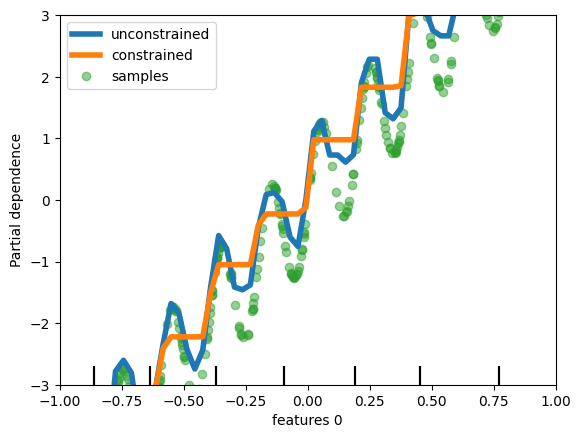

In [6]:
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split

# from skLearn.inspection import plot_patial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import HistGradientBoostingRegressor

n_samples = 500
rng = np.random.RandomState(0)
X = rng.randn(n_samples, 2)
noise = rng.normal(loc=0.0, scale=0.01, size=n_samples)
y = 5 * X[:, 0] + np.sin(10 * np.pi * X[:, 0]) - noise

gbdt_no_cst = HistGradientBoostingRegressor().fit(X, y)
gbdt_cst = HistGradientBoostingRegressor(monotonic_cst=[1, 0]).fit(X, y)

# plot_partial_dependence은 버전 1.2에서 제거되고 1.2부터는 PartialDependenceDisplay를 사용해야 한다.
# disp = plot_partial_dependece()
disp = PartialDependenceDisplay.from_estimator(
    gbdt_no_cst,
    X,
    features=[0],
    feature_names=["features 0"],
    line_kw={"linewidth": 4, "label": "unconstrained", "color": "tab:blue"},
)
# plot_partial_dependence()
PartialDependenceDisplay.from_estimator(
    gbdt_cst,
    X,
    features=[0],
    line_kw={"linewidth": 4, "label": "constrained", "color": "tab:orange"},
    ax=disp.axes_,
)
disp.axes_[0, 0].plot(
    X[:, 0], y, "o", alpha=0.5, zorder=-1, label="samples", color="tab:green"
)
disp.axes_[0, 0].set_ylim(-3, 3)
disp.axes_[0, 0].set_xlim(-1, 1)
plt.legend()
plt.show()

## Sample-weight support for Lasso and ElasticNet

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
import numpy as np

n_samples, n_features = 1000, 20
X, y = make_regression(n_samples, n_features, random_state=rng)
sample_weight = rng.rand(n_samples)
X_train, X_test, y_train, y_test, sw_train, sw_test = train_test_split(
    X, y, sample_weight, random_state=rng
)
reg = Lasso()
reg.fit(X_train, y_train, sample_weight=sw_train)
print(reg.score(X_test, y_test, sw_test))

0.9995396525935993
